In [1]:
import json # citire fisier
import gensim.downloader as api # word2vec pretrained
import numpy as np # X
import scipy.cluster.hierarchy as shc # hierarchical clustering
import matplotlib.pyplot as plt # vizualizare dendograma
import pandas as pd # date tensorboard
import os # tensorboard
import tensorflow as tf # tensorboard
from sklearn.decomposition import PCA as sklearnPCA # transformate date pentru tensorboard

In [2]:
sentences = []
with open('../../preprocesareVenue/venues_reduced_10.json', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

1316


In [3]:
model = api.load('glove-wiki-gigaword-100')

In [4]:
X = []
wrong_words = 0
total_words = 0

new_sentences = []

for sentence in sentences:
    word_vector = []
    new_sentence = []
    
    for word in sentence:
        total_words += 1
        try:
            word_vector.append(model[word])
            new_sentence.append(word)
        except:
            print(word)
            wrong_words += 1
    leng = len(word_vector)
      
    if (leng > 0):
        avg_vect = np.zeros(100)  
        X.append(avg_vect)
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        if (leng != 1):
            for i in range(0,100):
                avg_vect[i] /= leng 
            
        new_sentences.append(new_sentence)

aeromechanics
anaphor
precedings


In [5]:
print(len(new_sentences))
print(wrong_words)
print(total_words)

1315
3
2037


In [6]:
X = np.array(X)
np.save('X.npy', X) 

In [7]:
X = np.load('X.npy')

## Apply Hierarchical Clustering

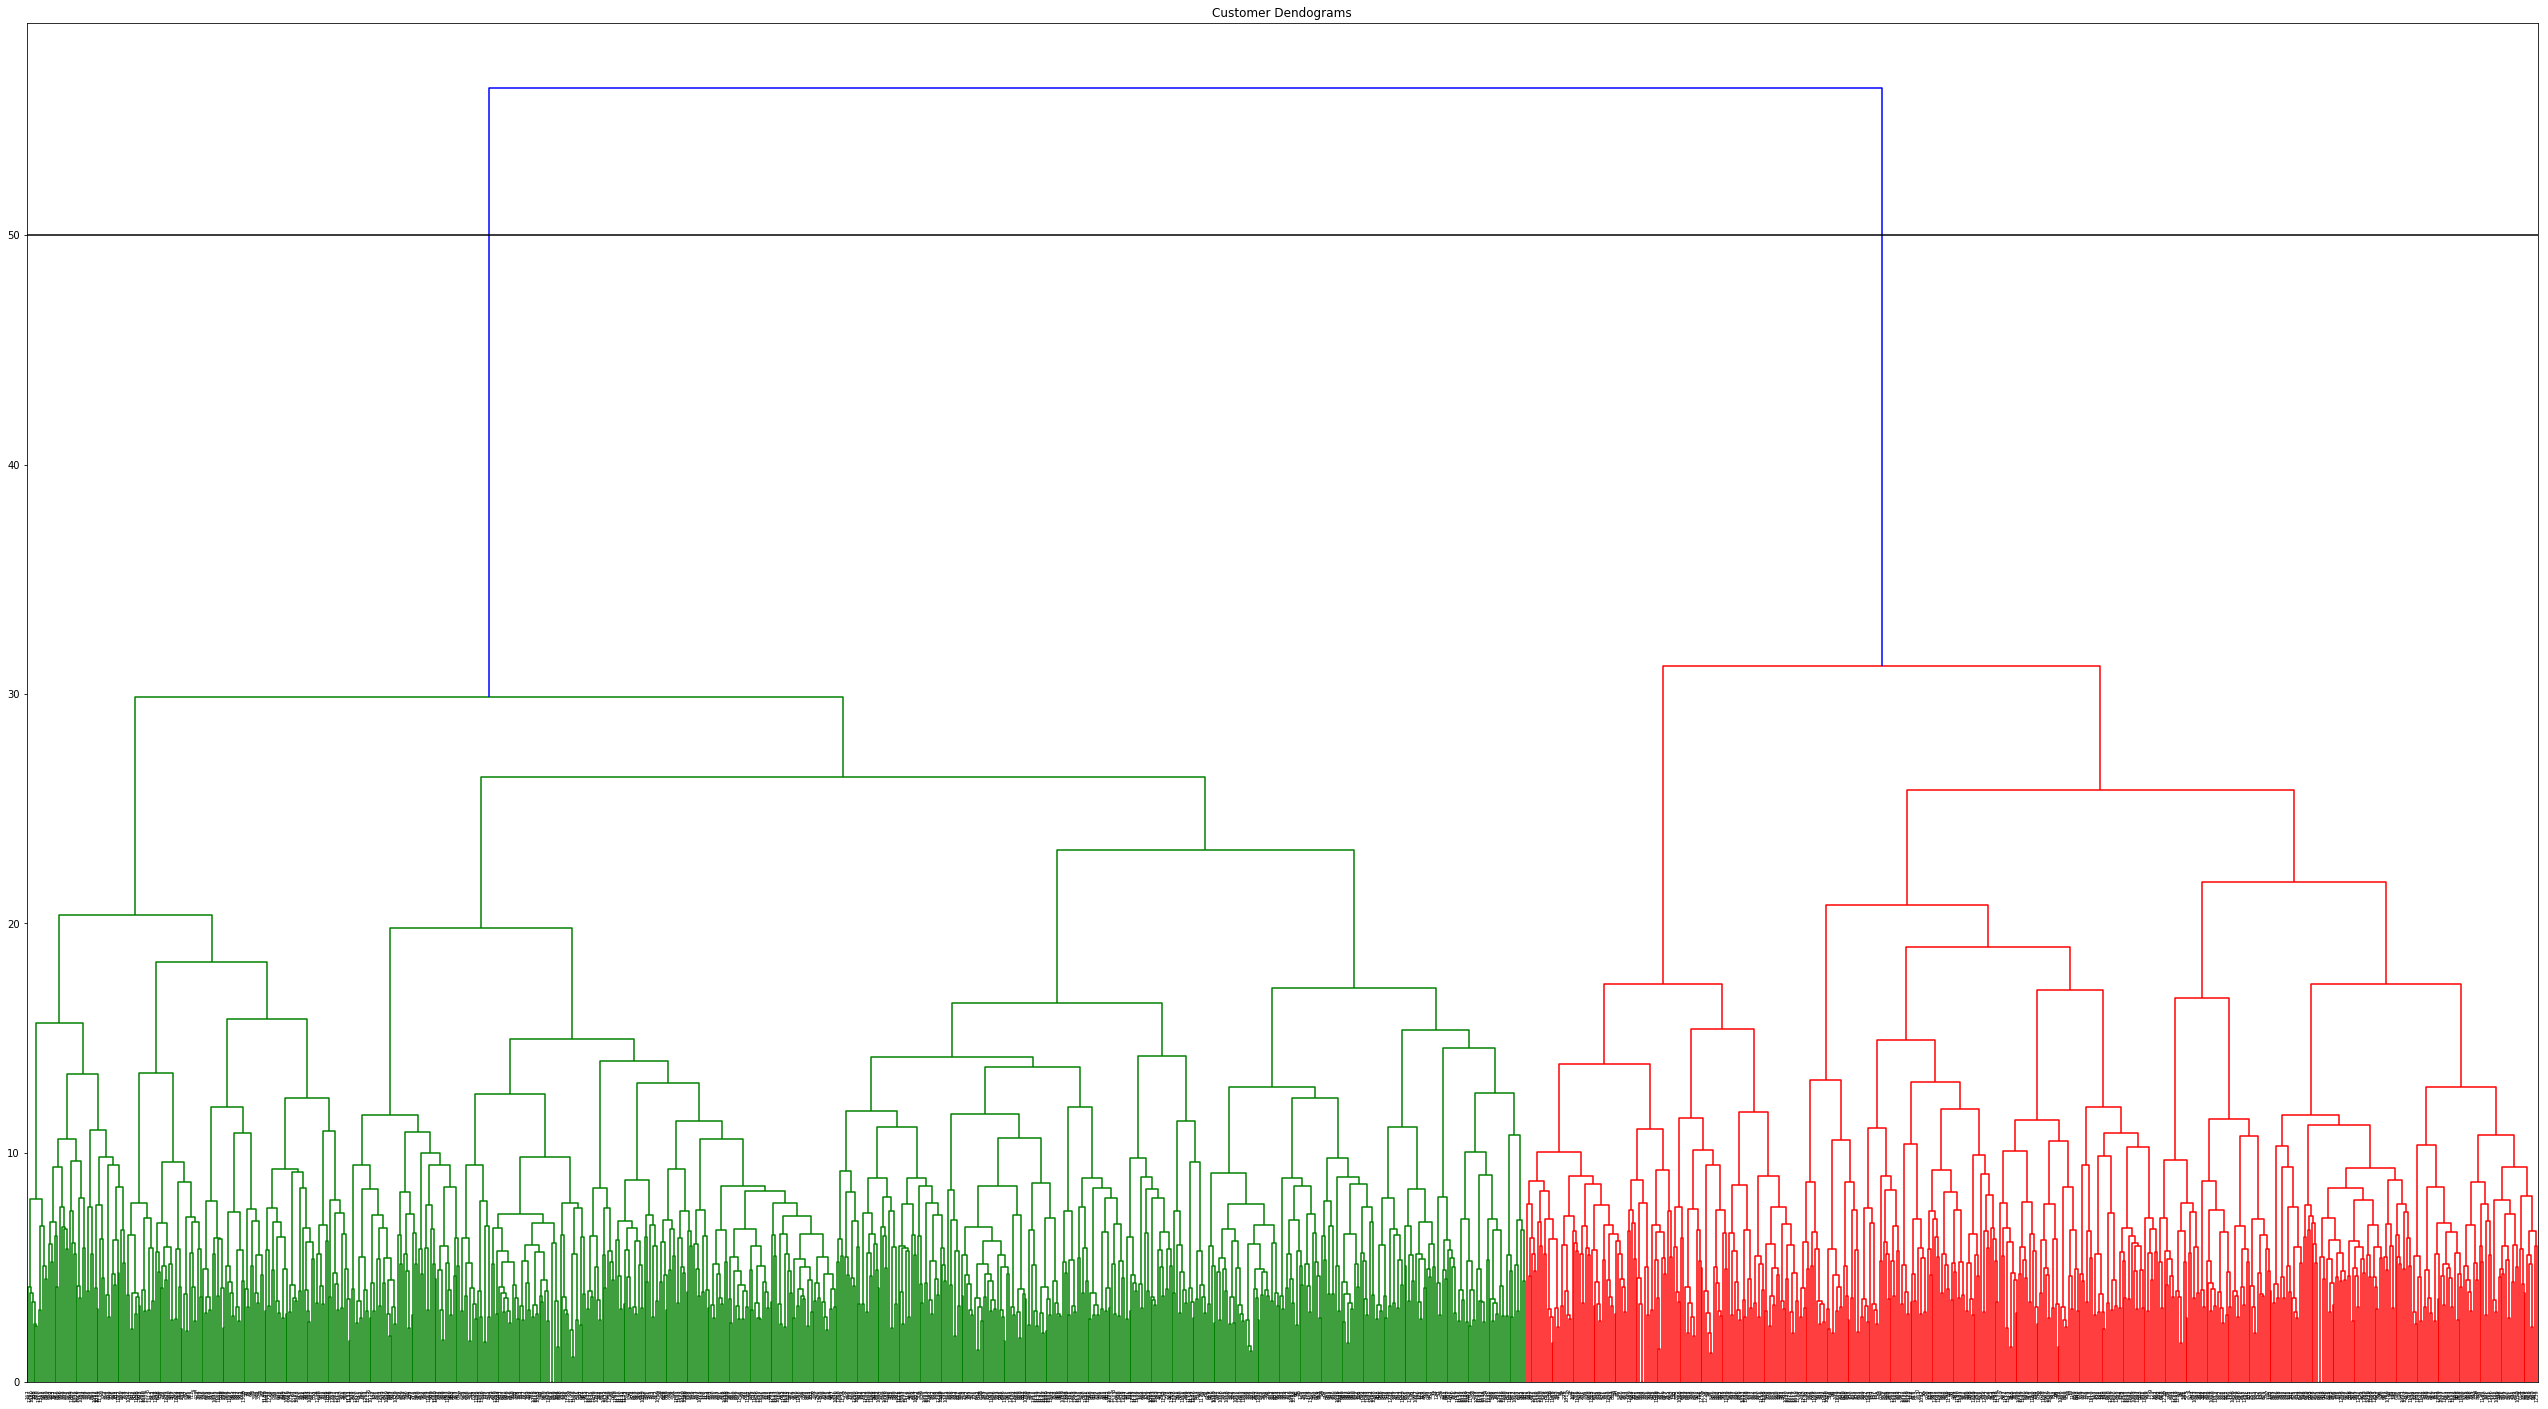

In [8]:
data = X
max_d = 50

plt.figure(figsize=(45, 25))  
plt.title("Customer Dendograms")  
plt.axhline(y=max_d, c='k')
Z = shc.linkage(data, method='ward')
dend = shc.dendrogram(Z)  

## Elbow Method

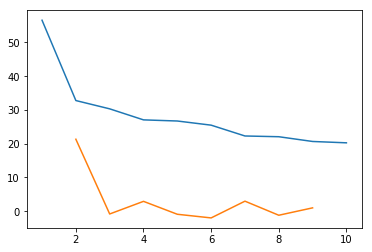

clusters: 2


In [19]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

## Apply Agglomerative Clustering

## Tensorboard

In [25]:
pca = sklearnPCA(n_components=20) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

PATH = os.getcwd()

LOG_DIR = PATH + '/result/'

# metadata = os.path.join(LOG_DIR, 'cl22.tsv')

pca = sklearnPCA(n_components=50) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    # embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'projector' is not defined